In [23]:
from liset_tk import liset_tk
import numpy as np
import matplotlib.pyplot as plt
import os

In [48]:
#### LAB PC
# parent = r"C:\__NeuroSpark_Liset_Dataset__\neurospark_mat\CNN_TRAINING_SESSIONS" # Modify this to your data path folder

### HOME PC
parent=r"E:\neurospark_mat\CNN_TRAINING_SESSIONS"
downsampled_fs= 1000

ripples_list=[]
time=[]
ripple_num=[]
difference_between=[]
datasets=os.listdir(parent)
for dataset in datasets:
    dataset_path = os.path.join(parent, dataset)
    liset = liset_tk(dataset_path, shank=3, downsample=downsampled_fs, start=0, verbose=False)
    ripples=liset.ripples_GT
    ripples = ripples[np.argsort(ripples[:, 0])]
    ripples_list.append(ripples)

    durations = (ripples[:, 1] - ripples[:, 0])/downsampled_fs*1000 # Convert to milliseconds

    mean_duration = np.mean(durations)
    std_duration = np.std(durations)
    num_ripples=ripples.shape[0]
    rate=num_ripples/(liset.data.shape[0]/downsampled_fs) #ripples/s
    time.append(liset.data.shape[0]/downsampled_fs)
    ripple_num.append(num_ripples)
    print(f"Dataset: {dataset}, Mean Duration: {mean_duration:.2f} ms, Std Duration: {std_duration:.2f} ms, Rate: {rate:.2f} ripples/s")

    # print(ripples[:10])
    for i in range(len(ripples)-1):
        difference_between.append(ripples[i+1,0]-ripples[i,1])
    
    # print(ripples[:,0])
    # print(difference_between)
    print(max(difference_between))
    print(min(difference_between))
    # print(difference_between)


Dataset: Amigo2_1_hippo_2019-07-11_11-57-07_1150um, Mean Duration: 50.36 ms, Std Duration: 14.57 ms, Rate: 0.55 ripples/s
76843
10
Dataset: Som_2_hippo_2019-07-24_12-01-49_1530um, Mean Duration: 36.79 ms, Std Duration: 10.68 ms, Rate: 0.47 ripples/s
76843
7


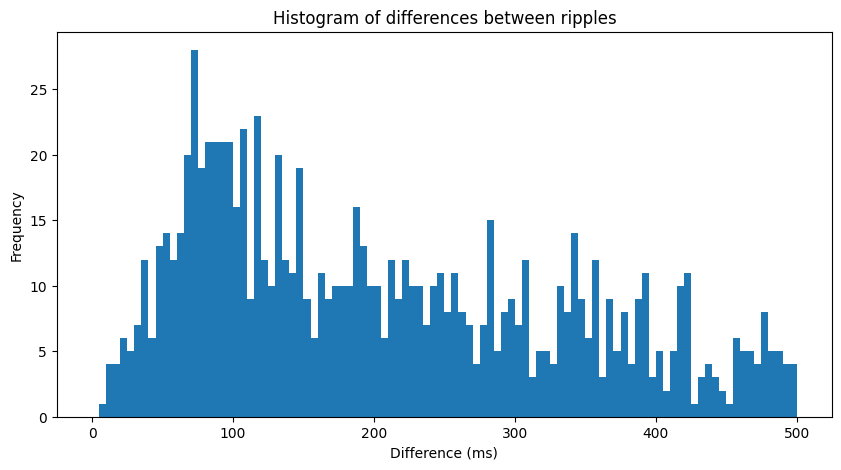

In [50]:
# Plot histogram with the difference between ripples

plt.figure(figsize=(10, 5))
plt.hist(difference_between, bins=100,range=(0,500))
plt.title('Histogram of differences between ripples')
plt.xlabel('Difference (ms)')
plt.ylabel('Frequency')

plt.show()

In [51]:
all_ripples = np.concatenate(ripples_list, axis=0)
durations = (all_ripples[:, 1] - all_ripples[:, 0]) / downsampled_fs * 1000
mean_duration = np.mean(durations)
std_duration = np.std(durations)
ripple_num=all_ripples.shape[0]
mean_rate=ripple_num/sum(time) # ripples/s
print(f"\nOverall Mean Duration: {mean_duration:.2f} ms, Std: {std_duration:.2f} ms, Rate: {mean_rate:.2f} ripples/s")


Overall Mean Duration: 46.69 ms, Std: 14.90 ms, Rate: 0.52 ripples/s


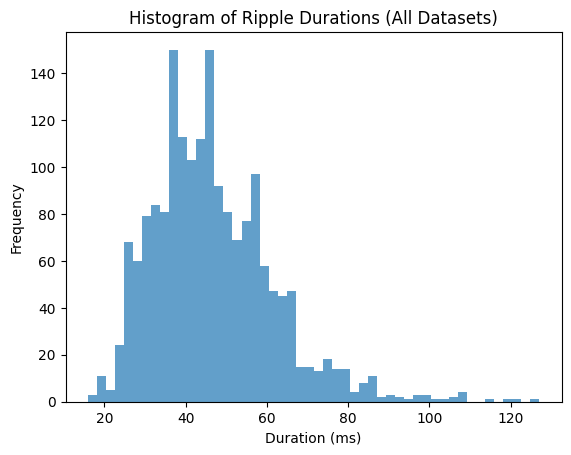

In [52]:
plt.hist(durations, bins=50, alpha=0.7)
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.title('Histogram of Ripple Durations (All Datasets)')
plt.show()

In [53]:

# Now compute statistics
avg_diff = np.mean(difference_between)
median_diff = np.median(difference_between)
max_diff = np.max(difference_between)
min_diff = np.min(difference_between)
std_diff = np.std(difference_between)

# Print results
print(f"Average difference: {avg_diff}")
print(f"Median difference: {median_diff}")
print(f"Max difference: {max_diff}")
print(f"Min difference: {min_diff}")
print(f"Standard Deviation: {std_diff}")

Average difference: 1845.1796875
Median difference: 468.5
Max difference: 76843
Min difference: 7
Standard Deviation: 4236.308554988594


In [56]:
# Get the indices of max and min
max_idx = np.argmax(difference_between)
min_idx = np.argmin(difference_between)
print(all_ripples[max_idx+1],all_ripples[max_idx])
print(all_ripples[min_idx+2],all_ripples[min_idx+1])  

print(all_ripples[max_idx+1,0]-all_ripples[max_idx,1])
print(all_ripples[min_idx+2,0]-all_ripples[min_idx+1,1])

[1845373 1845415] [1768478 1768530]
[295149 295205] [295082 295142]
76843
7
